In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("insurance_part2_data.csv")

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.shape

(3000, 10)

In [7]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
df[df.isnull().sum().index].dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

Univariate Analysis

<AxesSubplot:xlabel='Sales', ylabel='Density'>

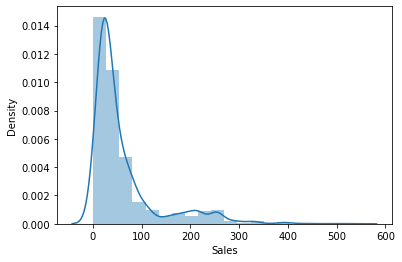

In [9]:
sns.distplot(df.Sales,bins=20) 

<AxesSubplot:xlabel='Age', ylabel='Density'>

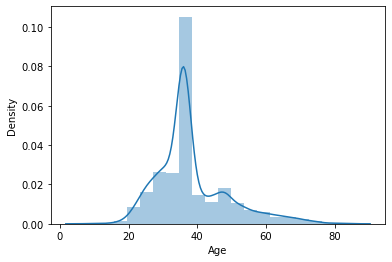

In [140]:
sns.distplot(df.Age,bins=20) 

<AxesSubplot:xlabel='Commision', ylabel='Density'>

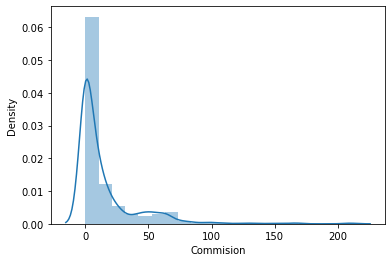

In [141]:
sns.distplot(df.Commision,bins=20) 

<AxesSubplot:xlabel='Duration', ylabel='Density'>

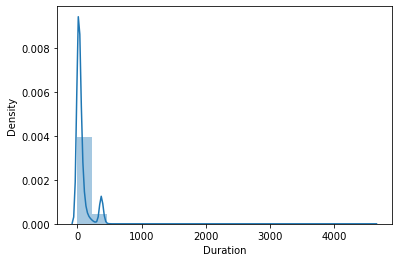

In [142]:
sns.distplot(df.Duration,bins=20) 

<AxesSubplot:xlabel='Type', ylabel='count'>

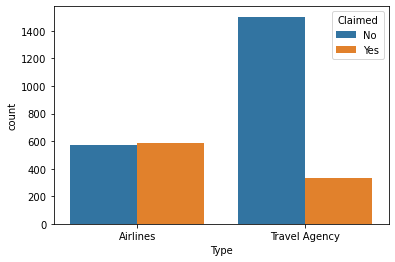

In [10]:
fig_dims = (20, 15)
sns.countplot(df["Type"],hue=df["Claimed"])

In [11]:
print("skewness of sales is",df['Sales'].skew())
print("kurtosis of sales is ", df['Sales'].kurtosis())

skewness of sales is 2.381148461687274
kurtosis of sales is  6.155247847290935


Skewness assesses the extent to which a variable’s distribution is symmetrical

Kurtosis is a measure of whether the distribution is too peaked

Bivariate Analysis

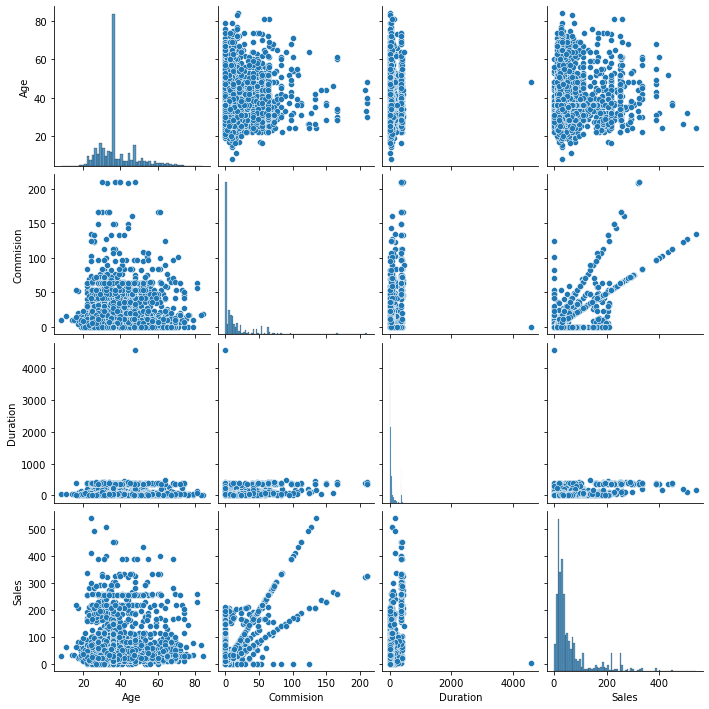

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


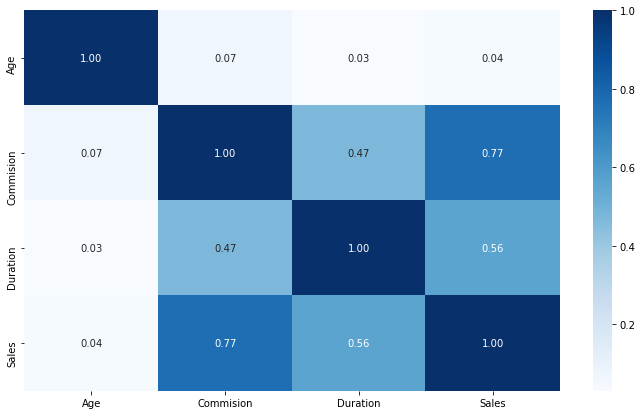

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Multivariate analysis

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

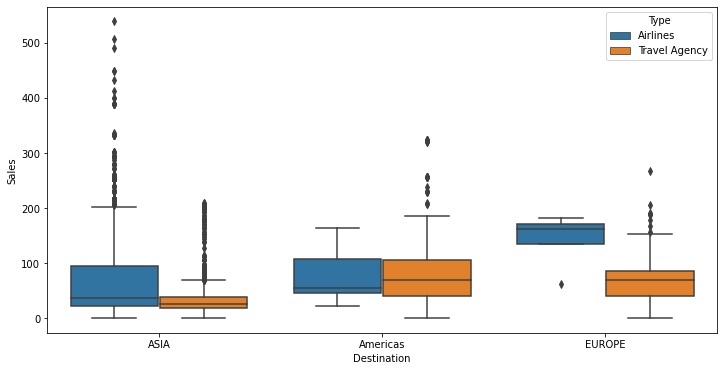

In [15]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Destination', y='Sales', hue='Type',data=df)

In [16]:
print(np.std(df))

Age           10.461774
Commision     25.477207
Duration     134.030969
Sales         70.722164
dtype: float64


In [17]:
print(np.var(df))

Age            109.448719
Commision      649.088089
Duration     17964.300665
Sales         5001.624418
dtype: float64


In [18]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']
['Age', 'Commision', 'Duration', 'Sales']


In [19]:
df[cat]

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA
...,...,...,...,...,...,...
2995,CWT,Travel Agency,Yes,Online,Gold Plan,Americas
2996,C2B,Airlines,No,Online,Gold Plan,ASIA
2997,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2998,C2B,Airlines,Yes,Online,Bronze Plan,ASIA


In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [22]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [23]:
df_new =pd.get_dummies(df, columns=cat,drop_first=True)

In [24]:
df_new.head()

,Age,Commision,Duration,Sales,Agency_Code_1,Agency_Code_2,Agency_Code_3,Type_1,Claimed_1,Channel_1,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_1,Destination_2
0,48,0.70,7,2.51,0,0,0,0,0,1,0,1,0,0,0,0
1,36,0.00,34,20.00,0,1,0,1,0,1,0,1,0,0,0,0
2,39,5.94,3,9.90,1,0,0,1,0,1,0,1,0,0,1,0
3,36,0.00,4,26.00,0,1,0,1,0,1,1,0,0,0,0,0
4,33,6.30,53,18.00,0,0,1,0,0,1,0,0,0,0,0,0


In [25]:
X = df.drop(['Channel'],axis=1)
y = df['Channel']
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [26]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


In [88]:
from sklearn import tree

In [89]:
dtc=DecisionTreeClassifier(random_state=123)

In [90]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [91]:
print (pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Commision     0.288854
Agency_Code   0.285185
Sales         0.176340
Age           0.109807
Type          0.054106
Duration      0.051150
Product Name  0.028116
Claimed       0.006441
Destination   0.000000


In [92]:
y_predict = dtc.predict(X_test)

In [93]:
y_predict.shape

(900,)

In [94]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [95]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train))

ld_tree_regularized.close()
dot_data

In [96]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Commision     0.640653
Product Name  0.359347
Age           0.000000
Agency_Code   0.000000
Type          0.000000
Claimed       0.000000
Duration      0.000000
Sales         0.000000
Destination   0.000000


In [97]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [98]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


In [147]:
ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [148]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [149]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.001779,0.998221
4,0.000000,1.000000


AUC: 0.846


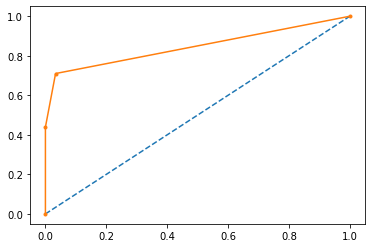

In [151]:
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.838


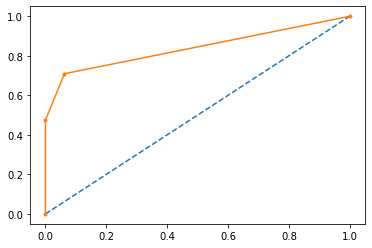

In [152]:
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion Matrix for the training data

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
confusion_matrix(train_labels, ytrain_predict)

array([[   0,   30],
       [   0, 2070]], dtype=int64)

In [106]:
reg_dt_model.score(X_train,train_labels) 

0.9857142857142858

In [107]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.99      1.00      0.99      2070

    accuracy                           0.99      2100
   macro avg       0.49      0.50      0.50      2100
weighted avg       0.97      0.99      0.98      2100



Confusion Matrix for test data

In [108]:
confusion_matrix(test_labels, ytest_predict)

array([[  0,  16],
       [  0, 884]], dtype=int64)

In [109]:
reg_dt_model.score(X_test,test_labels)

0.9822222222222222

In [110]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.98      1.00      0.99       884

    accuracy                           0.98       900
   macro avg       0.49      0.50      0.50       900
weighted avg       0.96      0.98      0.97       900



Random Forest

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 1)

In [113]:
rfc = RandomForestClassifier(n_estimators = 501, random_state=123)
rfc = rfc.fit(X_train, train_labels)

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [115]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [116]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [117]:
best_grid = grid_search.best_estimator_

In [118]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

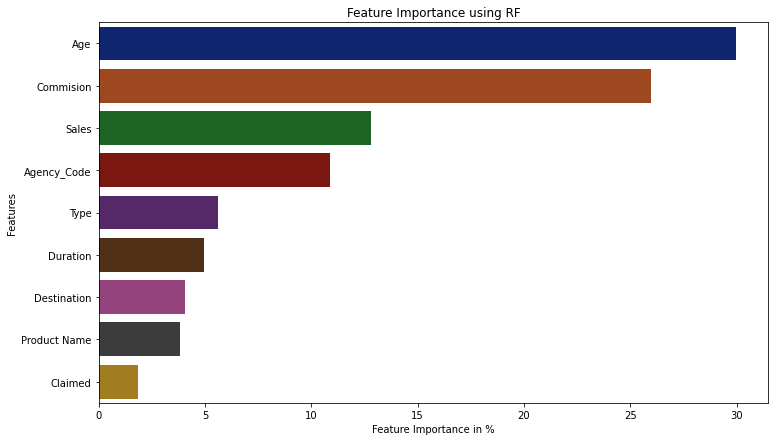

In [119]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()


In [166]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Age           0.299829
Commision     0.259716
Sales         0.128258
Agency_Code   0.109012
Type          0.056276
Duration      0.049469
Destination   0.040574
Product Name  0.038486
Claimed       0.018381


In [120]:
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
confusion_matrix(train_labels,ytrain_predict)

array([[   0,   30],
       [   0, 2070]], dtype=int64)

In [122]:
confusion_matrix(test_labels,ytest_predict)

array([[  0,  16],
       [  0, 884]], dtype=int64)

In [123]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.99      1.00      0.99      2070

    accuracy                           0.99      2100
   macro avg       0.49      0.50      0.50      2100
weighted avg       0.97      0.99      0.98      2100



In [124]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.98      1.00      0.99       884

    accuracy                           0.98       900
   macro avg       0.49      0.50      0.50       900
weighted avg       0.96      0.98      0.97       900



AUC: 0.984


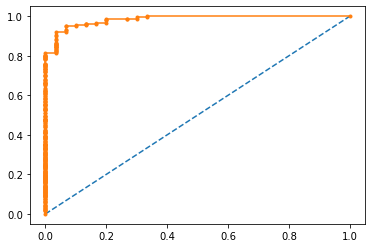

In [125]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.990


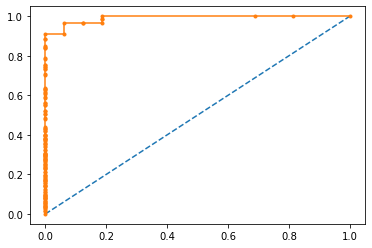

In [126]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

ANN

In [127]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 1)

In [128]:
mlp=MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=1,max_iter=500)

In [129]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=1,
              solver='sgd')

In [130]:
prediction_ann=mlp.predict(X_train)

In [131]:
from sklearn.metrics import accuracy_score

Accuracy for ANN model is 
 0.9866666666666667


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.75      0.10      0.18        30
           1       0.99      1.00      0.99      2070

    accuracy                           0.99      2100
   macro avg       0.87      0.55      0.58      2100
weighted avg       0.98      0.99      0.98      2100



Confusion Matrix for ANN model is


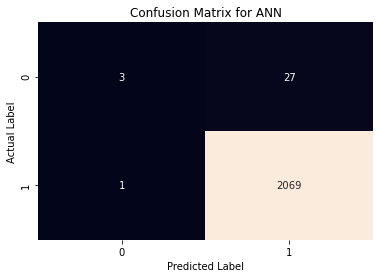

In [165]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_train,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_train,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_train,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [158]:
y_pred = mlp.predict(X_test)

In [159]:
confusion_matrix(y_test, y_pred)

array([[  1,  15],
       [  0, 884]], dtype=int64)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.98      1.00      0.99       884

    accuracy                           0.98       900
   macro avg       0.99      0.53      0.55       900
weighted avg       0.98      0.98      0.98       900



AUC: 0.797


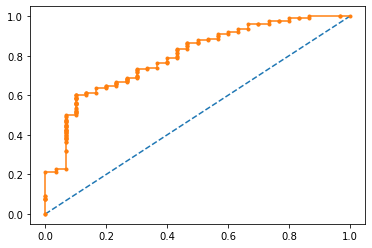

In [145]:
probs = mlp.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.707


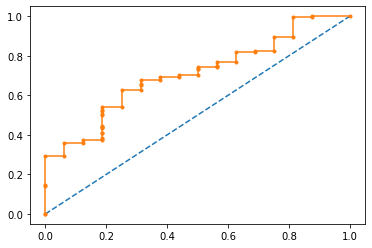

In [146]:
probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [136]:
models=[dtc,rfcl,mlp]
models_names={dtc:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.9955555555555555


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       1.00      1.00      1.00       884

    accuracy                           1.00       900
   macro avg       0.94      0.94      0.94       900
weighted avg       1.00      1.00      1.00       900



Confusion Matrix for DecisionTreeClassifier model is


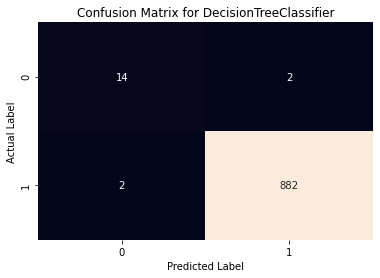

Accuracy for RandomForestClassifier model is 
 0.9966666666666667


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       1.00      1.00      1.00       884

    accuracy                           1.00       900
   macro avg       1.00      0.91      0.95       900
weighted avg       1.00      1.00      1.00       900



Confusion Matrix for RandomForestClassifier model is


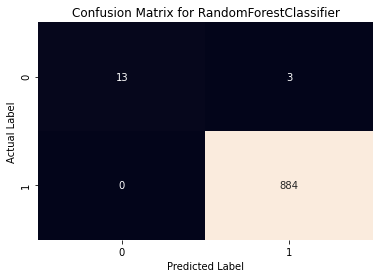

Accuracy for ANN model is 
 0.9833333333333333


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.98      1.00      0.99       884

    accuracy                           0.98       900
   macro avg       0.99      0.53      0.55       900
weighted avg       0.98      0.98      0.98       900



Confusion Matrix for ANN model is


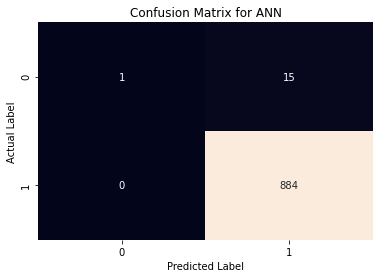

In [137]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

Area under the curve for Decision Tree Classification Model is 0.936368778280543
Area under the curve for Random Forest Classification Model is 0.9995050904977375
Area under the curve for Artificial Neural Network Model is 0.7069428733031675


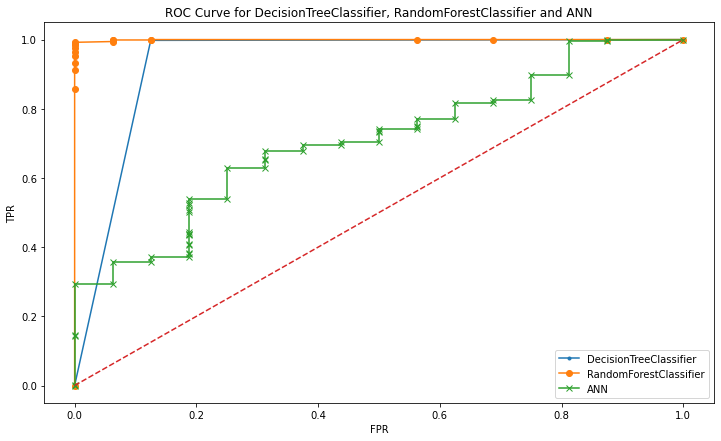

In [138]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_test,mlp.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfcl, tpr_rfcl, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfcl, tpr_rfcl, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()